##  reading the dataset

In [51]:
import pandas as pd
file = "C:\\Users\\varsh\\Downloads\\yelp Restaurent reviews.csv"
df = pd.read_csv(file)
df.head(20)

,Yelp URL,Rating,Year,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,08-07-2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...
5,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,05-01-2019,I've been coming to this ice cream stand since...
6,https://www.yelp.com/biz/sidney-dairy-barn-sidney,1,08-11-2016,The soft-serve is way too sweet and has a stra...
7,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,11-05-2016,My husband and I stopped here on the way back ...
8,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/19/2015,"Little piece of heaven, the best ice cream sho..."
9,https://www.yelp.com/biz/sidney-dairy-barn-sidney,2,7/26/2019,Went here for the 1st time tonight. I ordered ...


# Obtaining the stop words

In [52]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'yourselves', 'been', 'by', 'during', 'needn', 'above', 'out', "aren't", 'll', 'has', 'then', 'couldn', 'wouldn', 'which', 'his', 'had', 'down', 'him', 'whom', 'off', "needn't", 'about', 'myself', 'she', 'will', "isn't", 'mustn', 'we', 'herself', "hasn't", "wasn't", 'what', 'theirs', 'than', 'weren', 'with', 'as', 'again', 'have', 'further', "shouldn't", 'wasn', "mightn't", 'her', 'some', 'no', 'most', 'it', 'while', 'if', "didn't", 'few', 'shouldn', 'yourself', 'o', 'each', 'did', 'both', 'aren', 'or', 'doesn', 'into', 'am', 'so', 'are', 's', 'ourselves', 'an', "it's", 'now', 're', "hadn't", 'more', 'below', 'be', 'over', 'at', 'd', 'y', 'who', 'i', 'its', 'all', "won't", 'until', 'isn', "wouldn't", 'ma', 'haven', 'mightn', 'that', 'this', 'these', 'hers', 'from', 'for', 'very', 'yours', 'those', 'too', 'me', "you're", 'and', 'you', 'them', 'through', 'nor', 'before', 'just', 'ain', "don't", 'having', 'because', 'against', 'they', 'do', 'didn', 'where', 'being', "you've", 'on', 'he',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\varsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Regular Expressions

In [53]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [54]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Preprocessing the pipeline

In [55]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

In [56]:
df['tokens'] = df['Review Text'].apply(prepare, pipeline=pipeline)

# Counting the tokens

In [57]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [58]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
cream,17612
ice,16105
place,9440
good,8523
like,7032
one,6524
get,6040
chocolate,5799
great,5722


# drawing the wordcloud

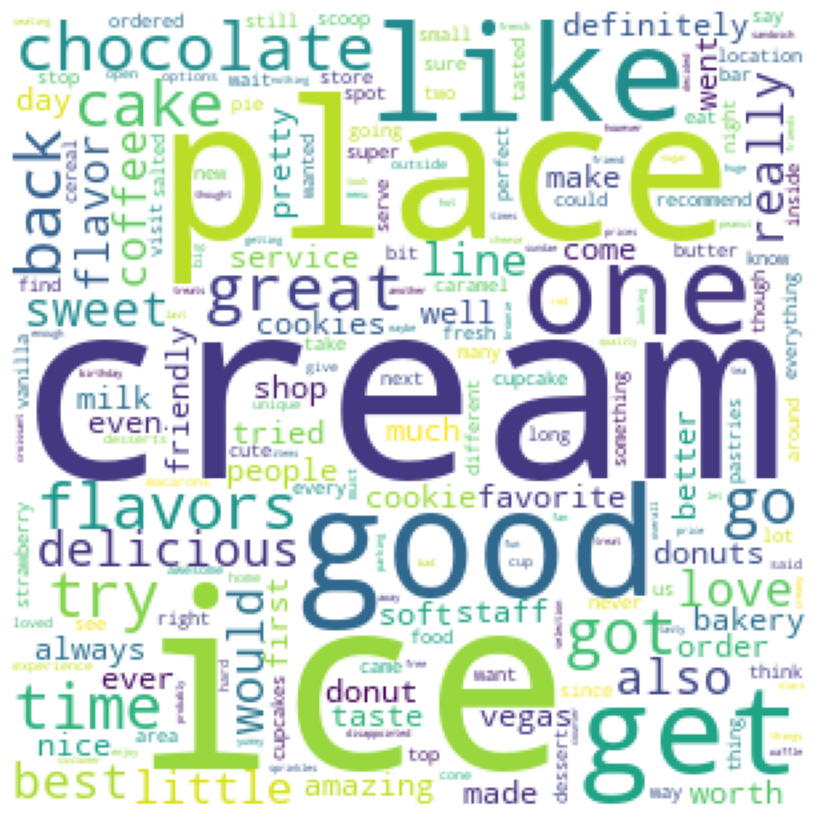

In [60]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# TF-IDF

In [61]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
            tokens = doc if preprocess is None else preprocess(doc)
            counter.update(set(tokens))
            
    counter = Counter()
    df[column].map(update)
    
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [62]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
cream,17612,16570.280491
ice,16105,16978.626358
place,9440,10825.355058
good,8523,10654.839375
like,7032,10536.962801


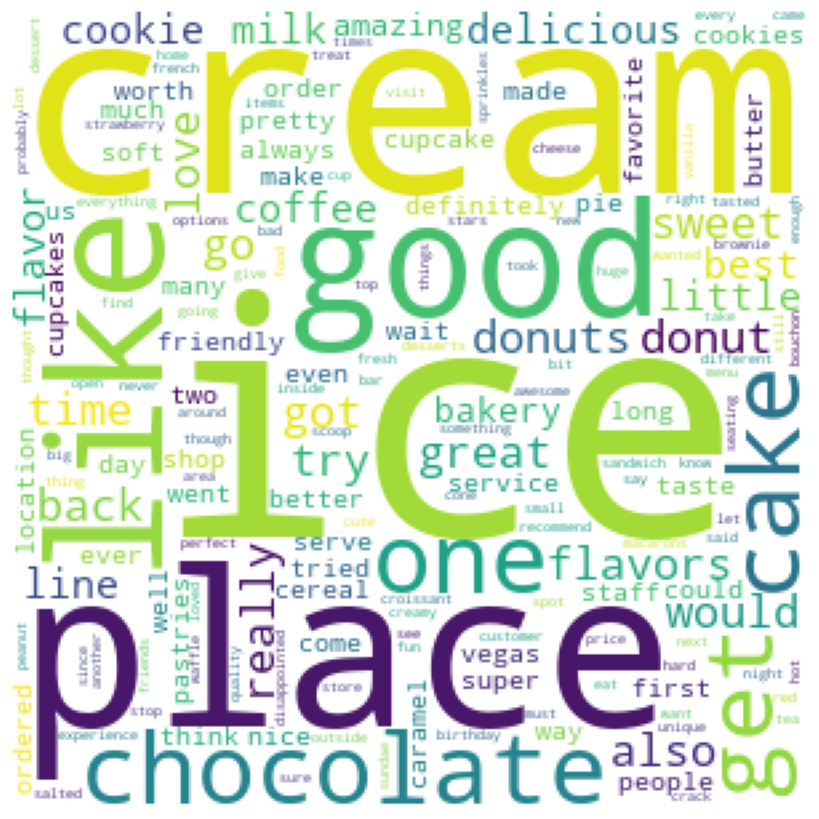

In [63]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [64]:
# And also we can try other years or countries for fun to see the comparision between the TF and TFIDF
# import pandas as pd
# file = “ "
# df = pd.read_csv(file)
# df= df[df['year']==2001]
# df.head(20)

# FUNCTION TO COUNT KEYWORDS

In [65]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# FUNCTION TO GROUP BY YEAR

In [66]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# DISPLAY THE GRAPH

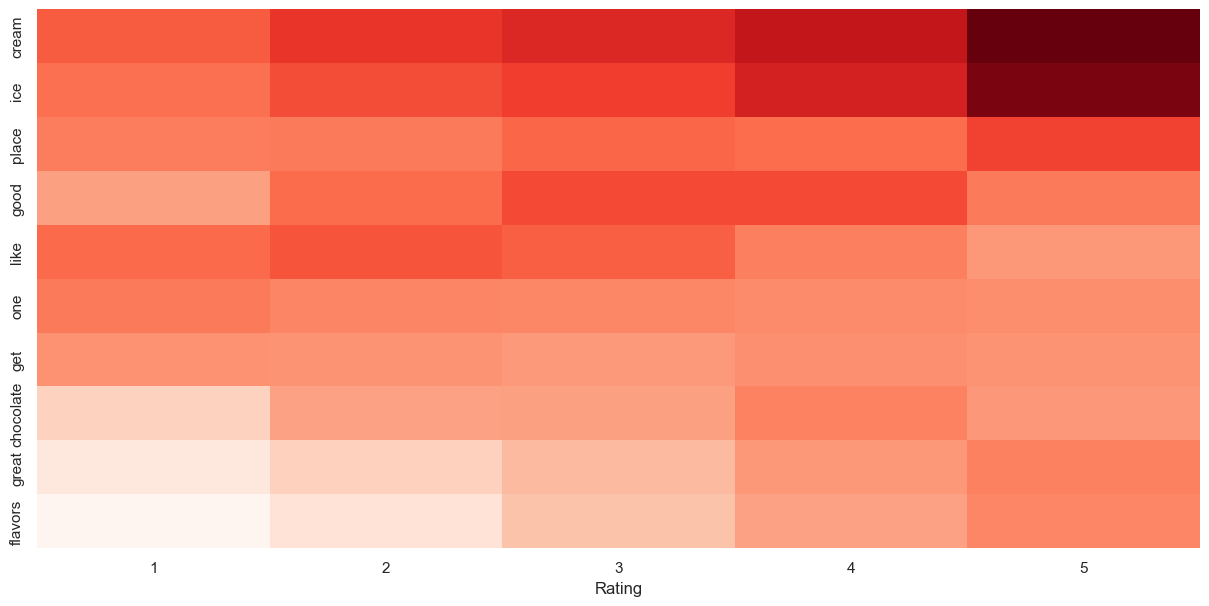

In [67]:
import seaborn as sns
keywords = ['cream', 'ice', 'place', 'good', 'like', 'one', 'get', 'chocolate', 'great', 'flavors']
freq_df = count_keywords_by(df, by='Rating', keywords=keywords)

freq_df = freq_df.div(df.groupby('Rating')['num_tokens'].sum(), axis=0)

freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)